In [4]:
!pip install mediapipe --user

  Using cached mediapipe-0.10.2-cp38-cp38-win_amd64.whl (50.2 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached opencv_contrib_python-4.8.0.74-cp37-abi3-win_amd64.whl (44.8 MB)
  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)


In [5]:
import cv2
import mediapipe as mp

In [9]:
# 동영상
cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()
    img = cv2.flip(img,1)
    
    if not ret:
        print('비디오 읽기 실패 또는 모두 읽음')
        cap.release()
        cv2.destroyAllWindows()
        break
    
    cv2.imshow('Game',img)
    k = cv2.waitKey(33)
    
    if k==49:
        cap.release()
        cv2.destroyAllWindows()
        break
        

KeyboardInterrupt: 

In [19]:
# 동영상과 mediapipe 연결하기

# mediapipe 불러오기

# 이미지에서 손과 손의 관절 출력(찾는다)하기 위한 함수
mp_hands = mp.solutions.hands
# 찾은 손의 관절을 그리는 함수
mp_drawing = mp.solutions.drawing_utils
# 손을 찾는다
hands = mp_hands.Hands(
    max_num_hands=2, # 최대로 찾을 손의 수
    # 손 분류하기
    min_detection_confidence=0.5, # 50% 이상 손이라고 판별된 것만 출력
    # 손의 위치 찾기
    min_tracking_confidence=0.5) # 50% 이상 손이라고 판별된 것만 출력

cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()
    img = cv2.flip(img,1)
    
    if not ret:
        print('비디오 읽기 실패 또는 모두 읽음')
        cap.release()
        cv2.destroyAllWindows()
        break
    
    # 사진에서 손 찾고 값 저장하기
    result = hands.process(img)
    if result.multi_hand_landmarks is not None:
        # 21개의 관절을 찾는다
        # print(result.multi_hand_landmarks)
        for res in result.multi_hand_landmarks:
            mp_drawing.draw_landmarks(img,res,mp_hands.HAND_CONNECTIONS)
    
    cv2.imshow('Game',img)
    k = cv2.waitKey(33)
    
    if k==49:
        cap.release()
        cv2.destroyAllWindows()
        break

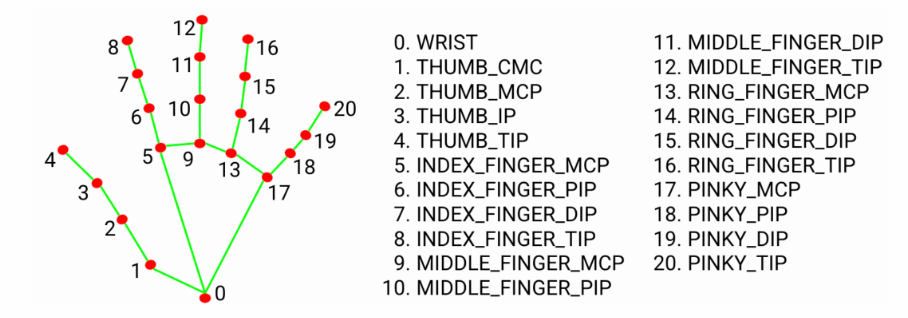